In [1]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
import os
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

!wget -q https://git.io/JYx2x -O resnet_cifar10_v2.py
import resnet_cifar10_v2

drive.mount('/content/drive/')
loc = 'drive/MyDrive/Shtem2023/'
print(os.listdir(loc+'/Results'))

Mounted at /content/drive/
['self_128_8_breastcancer.csv', 'cosineLoss_128_8_breastcancer (1).csv', 'cosineLoss_128_8_breastcancer.csv', 'cosineLoss_128_8_glaucoma.csv', 'self_128_8_glaucoma.csv', 'self_384_32_covid.csv', 'cosineLoss_384_32_covid.csv', 'cosineLoss_128_8_applescab.csv', 'self_128_8_applescab.csv', 'cosineLoss_128_128_breastcancer.csv', 'self_128_128_breastcancer.csv', 'cosineLoss_128_128_glaucoma.csv', 'self_128_128_glaucoma.csv', 'cosineLoss_128_128_applescab.csv', 'self_128_128_applescab.csv', 'self_384_16_covid.csv', 'cosineLoss_128_64_breastcancer.csv', 'self_128_64_breastcancer.csv', 'self_160_64_breastcancer.csv', 'selfLess_16_breastcancer.csv', 'selfLess_24_breastcancer.csv', 'cosineLoss_128_64_glaucoma.csv', 'selfLess_32_breastcancer.csv', 'self_160_56_breastcancer.csv', 'self_128_64_glaucoma.csv', 'selfLess_40_breastcancer.csv', 'selfLess_48_breastcancer.csv', 'cosineLoss_128_64_applescab.csv', 'selfLess_56_breastcancer.csv', 'self_128_64_applescab.csv', 'selfL

In [2]:
os.listdir(loc+'all_data')
for filename in 'breastcancerY.npy covidY.npy applescabY.npy glaucomaY.npy cifar10Y.npy'.split():
  data = np.load(loc+'all_data/'+filename)
  print(filename,data.shape)

breastcancerY.npy (979, 2)
covidY.npy (7135, 4)
applescabY.npy (2555, 2)
glaucomaY.npy (1674, 2)
cifar10Y.npy (8000, 1)


In [3]:
os.listdir(loc+'all_data')
for filename in 'breastcancerX.npy applescabX.npy glaucomaX.npy cifar10X.npy'.split():
  data = np.load(loc+'all_data/'+filename)
  print(filename,data.shape)

breastcancerX.npy (979, 250, 250, 3)
applescabX.npy (2555, 250, 250, 3)
glaucomaX.npy (1674, 250, 250, 3)
cifar10X.npy (8000, 32, 32, 3)


In [4]:
all_CSV = {}
for filename in os.listdir(loc + 'Results'):
  if '.csv' in filename:
    all_CSV[filename]= pd.read_csv (loc + 'Results/'+ filename)


In [5]:
cifarselfless=[]
cifarsizes=[]
for filename in os.listdir(loc + 'Results'):
  if 'covid' in filename and 'self' in filename:
    cifarselfless.append (np.max(all_CSV[filename] ['accuracy'].values))
    elisa= filename.index ('_')
    elisa2= filename.index ('_',elisa + 1)
    cifarsizes.append (int(filename[elisa + 1: elisa2]))


In [6]:
# for filename in os.listdir(loc + 'Results'):
#   if '.csv' in filename and 'breastcancer' in filename:
#     Iris = pd.read_csv(loc + 'Results/'+ filename)
#     if 'val_accuracy' in list(Iris.columns):
#       print (filename)
#       print (Iris.columns)


In [ ]:
selfless=[]
littleNs=[]
col = 'accuracy'
# in line 10 and 36 make min if loss and max if accuracy
dataset = 'breastcancer'
for filename in os.listdir(loc + 'Results'):
  if dataset in filename and 'elf' in filename:
    df = pd.read_csv(loc + 'Results/'+ filename)
    if col in list(df.columns):
      val = np.max(df[col].values)
      selfless.append (val)
      i0= filename.index ('_')
      i1= filename.index ('_',i0+ 1)
      littleNs.append (int(filename[i0 + 1: i1]))
      if littleNs[-1] ==300:
        del littleNs[-1]
        del selfless[-1]
# plt.figure(figsize=(8,21))
plt.subplots(4,1,figsize=(8,18))
plt.subplot(411)
plt.scatter(littleNs, selfless)
plt.title('raw '+dataset+ ' ' +col)
plt.xlabel('Labeled Dataset Sizes')
plt.ylabel('Performance Metric')
#plt.show()

selfLearn=[]
littleNs2=[]
Ns = []
for filename in os.listdir(loc + 'Results'):
  #change 's' to 'S' where little s is your data, and S is my data
  if dataset in filename and 'self_' in filename:
    df = pd.read_csv(loc + 'Results/'+ filename)
    if col in list(df.columns):
      #selfLearn.append (np.max(df[col].values))
      #print(filename,np.max(df[col].values) )
      i0= filename.index ('_')
      i1= filename.index ('_',i0+ 1)
      i2= filename.index ('_',i1+ 1)
      #littleNs.append (int(filename[i1+1:i2]))
      #Ns.append (int(filename[i0+1:i1]))
      val = np.max(df[col].values)
      N = int(filename[i0+1:i1])
      n = int(filename[i1+1:i2])
      selfLearn.append (val)
      littleNs2.append (n)
      Ns.append (N)

# plt.figure(figsize=(8,3))
plt.subplot(412)
plt.scatter(littleNs2, selfLearn)
plt.title('selfLearning ' +dataset+ ' ' +col)
plt.xlabel('Labeled Dataset Sizes')
plt.ylabel('Performance Metric')
#plt.show()

# plt.figure(figsize=(8,3))
plt.subplot(413)
plt.scatter(littleNs2, Ns, color ='orange')
plt.title('selfLearning unlabeled ' +dataset+ ' dataset size')
plt.xlabel('Labeled Dataset Sizes')
plt.ylabel('Unlabeled Dataset Sizes')
#plt.show()

sharedLittleNs = []
perfDiff = []
for i in littleNs:
  if i in littleNs2:
    sharedLittleNs.append(i)
    idx1 = littleNs.index(i)
    idx2 = littleNs2.index(i)
    selfLearnPerf = selfLearn[idx2]
    selfLessPerf = selfless[idx1]
    perfDiff.append(    selfLearnPerf - selfLessPerf)
# plt.figure(figsize=(8,3))
plt.subplot(414)
plt.scatter(sharedLittleNs,perfDiff)
plt.title(dataset+' '+col+' improvement by Self Learning')
plt.xlabel('Labeled Dataset Sizes')
plt.ylabel('Performance Metric')
plt.tight_layout()

plt.savefig(loc+'pltGraphs/'+dataset+'_'+col+'.png')
plt.show()

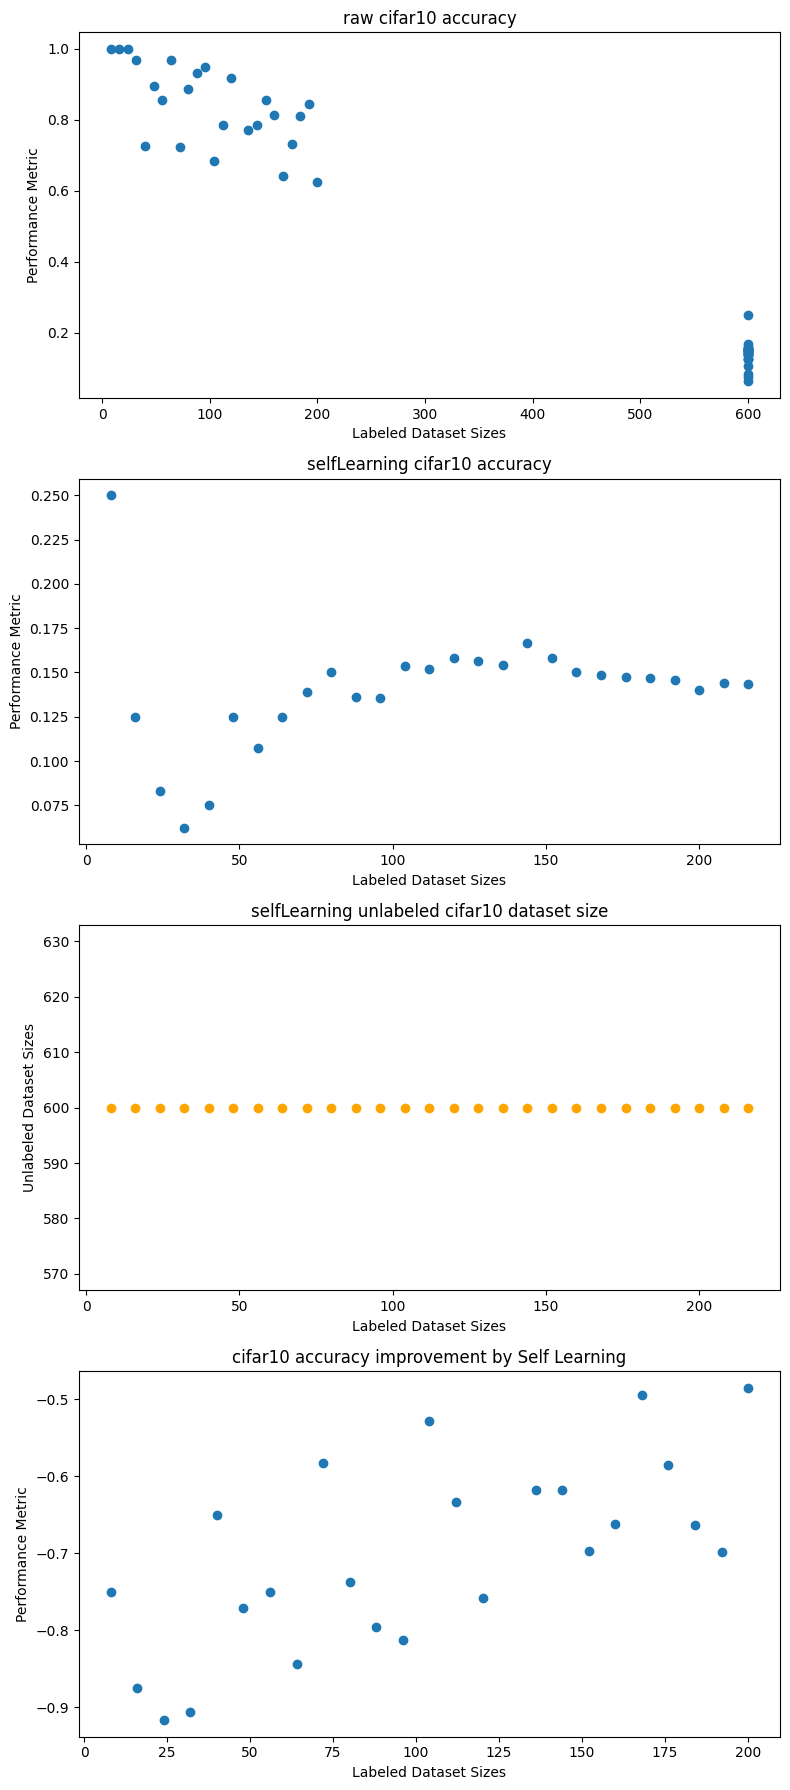

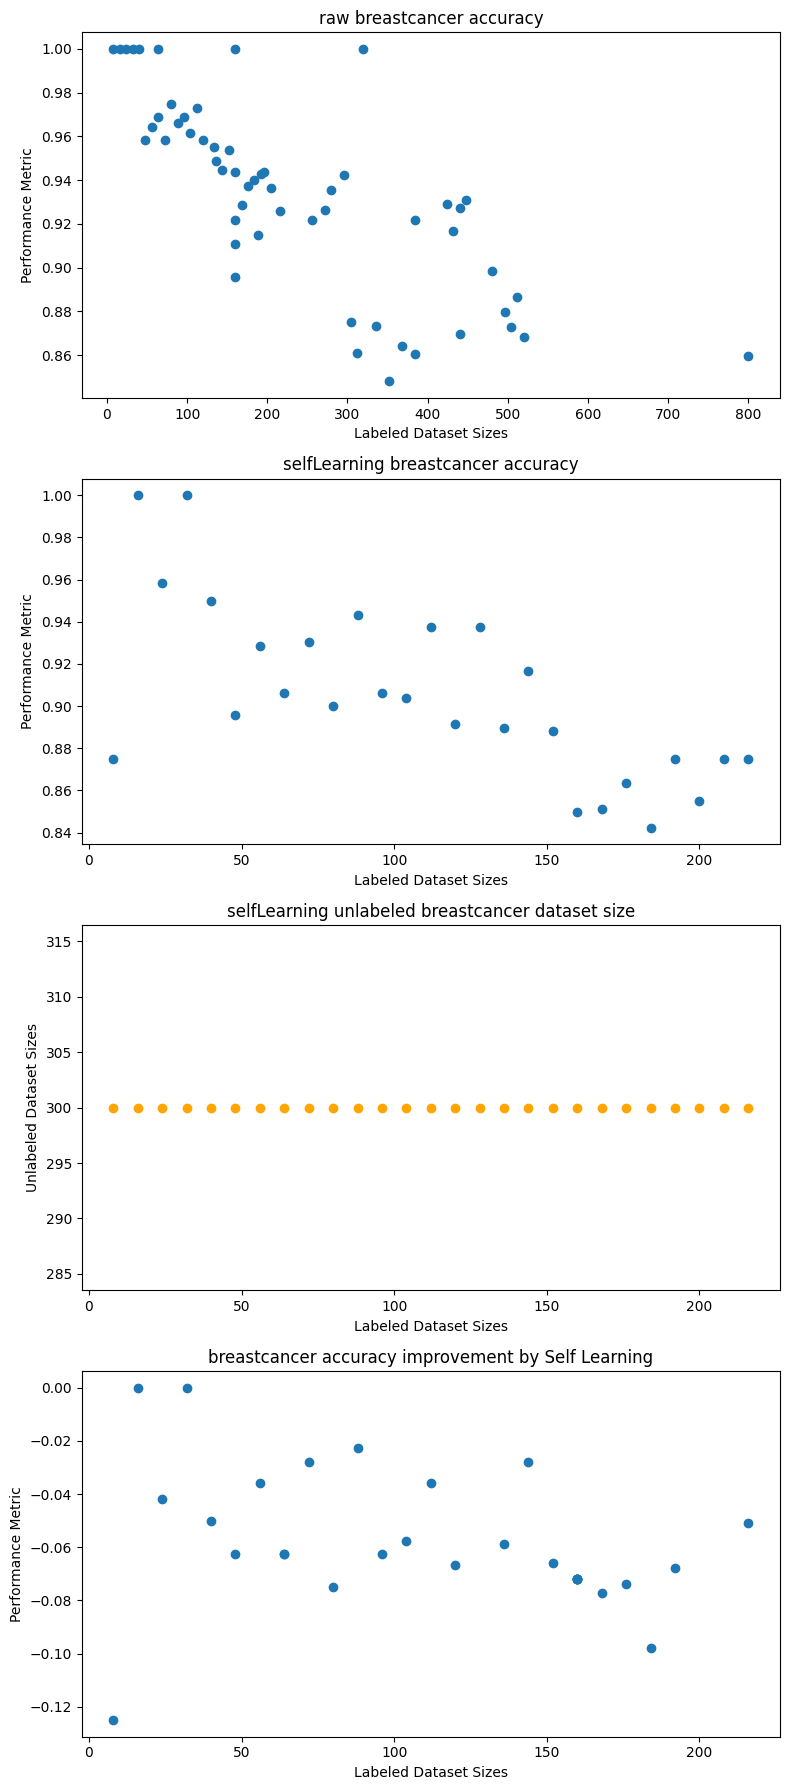

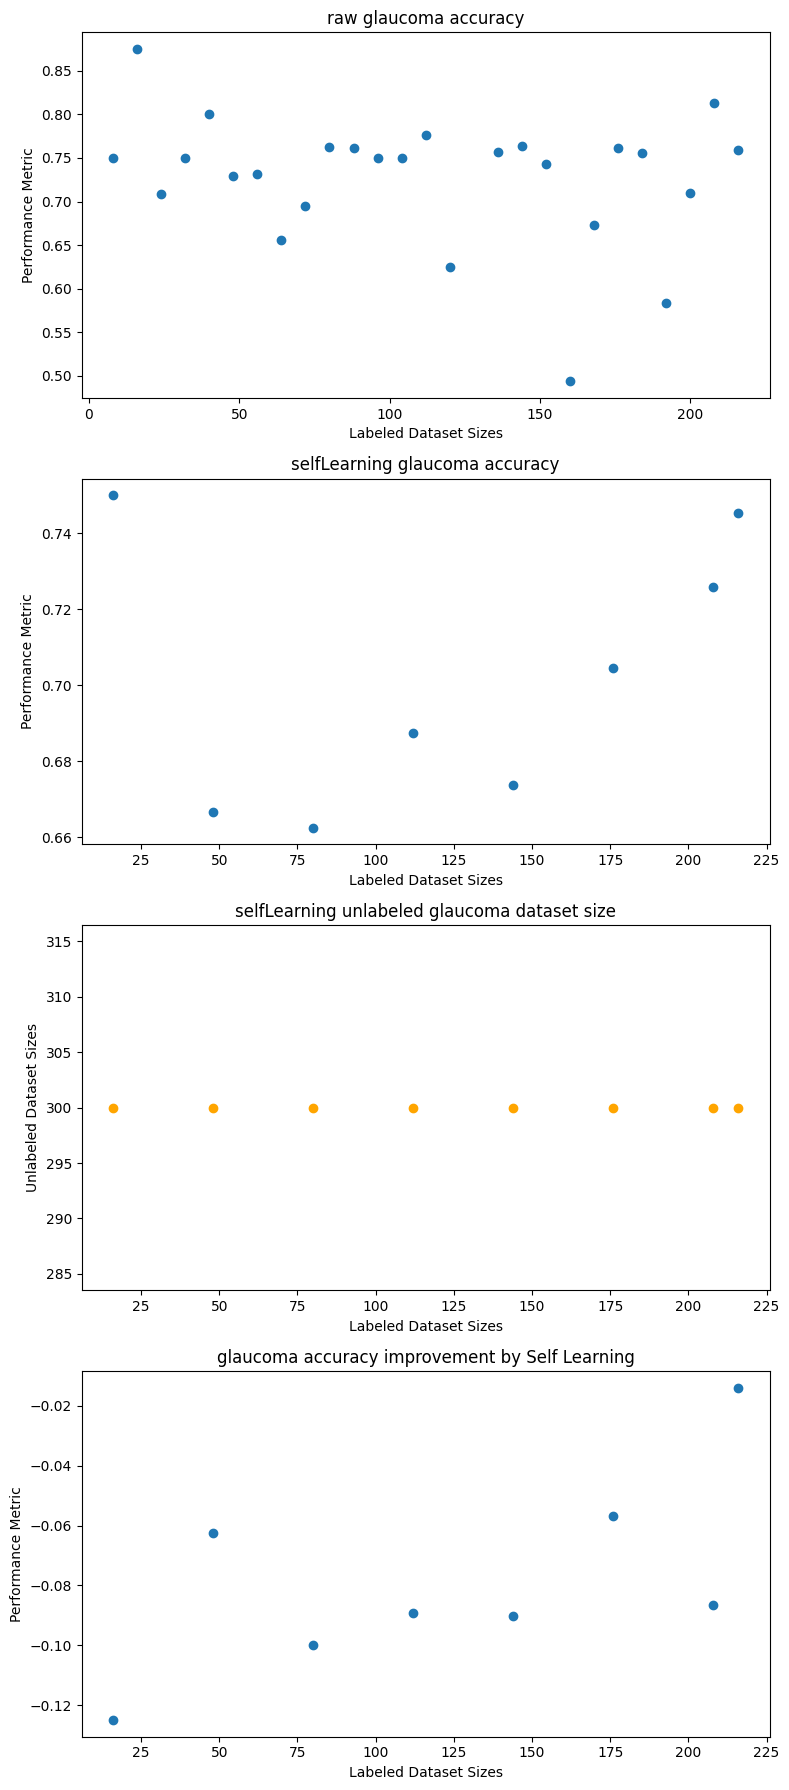

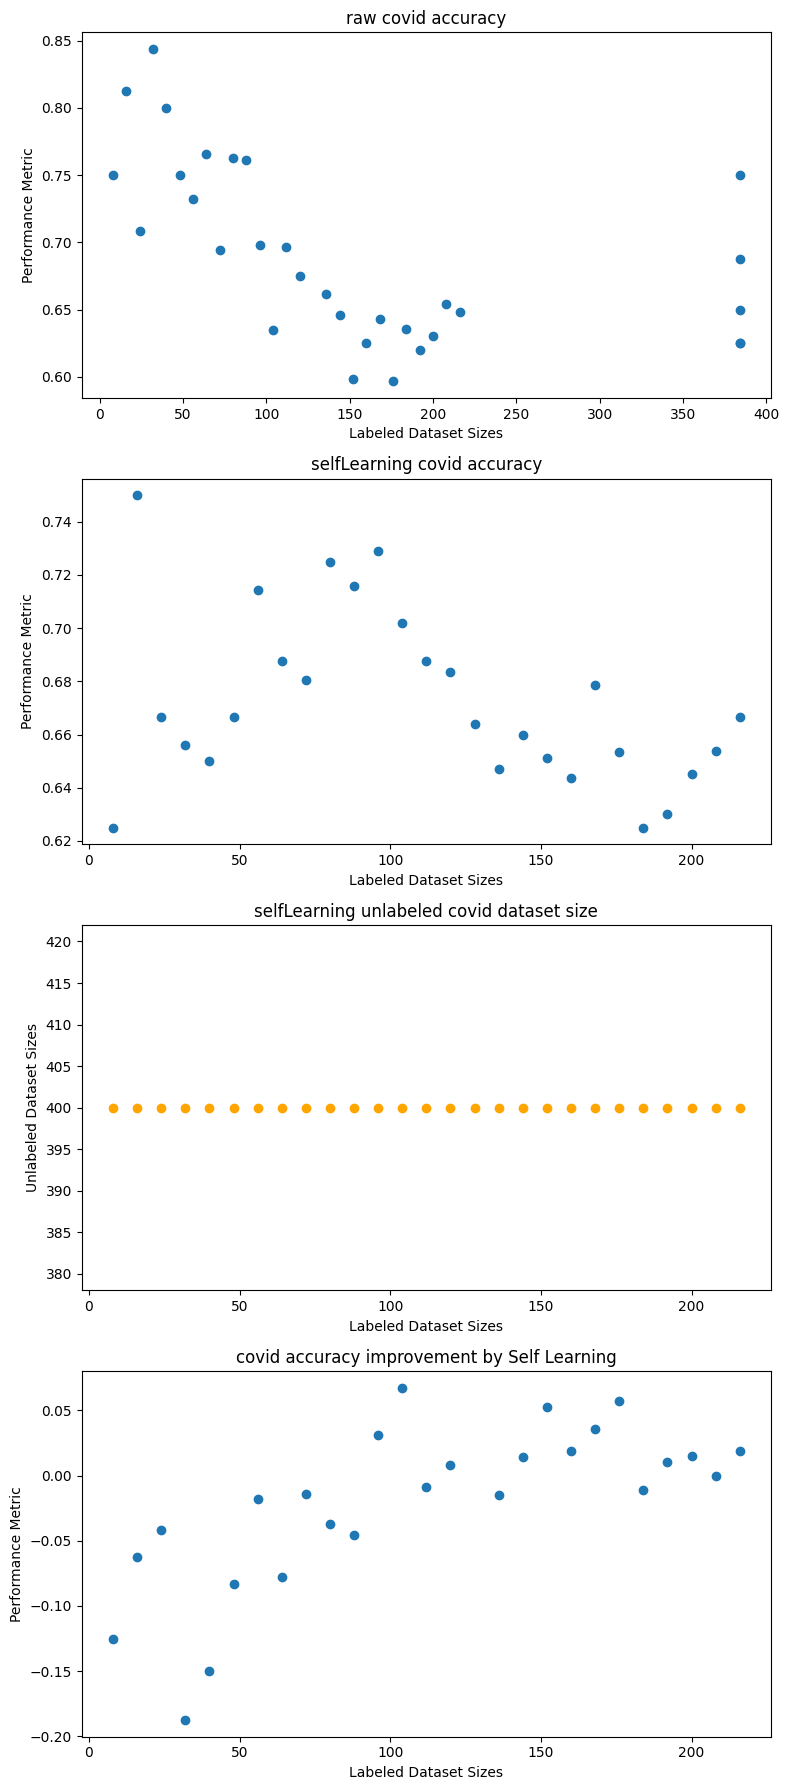

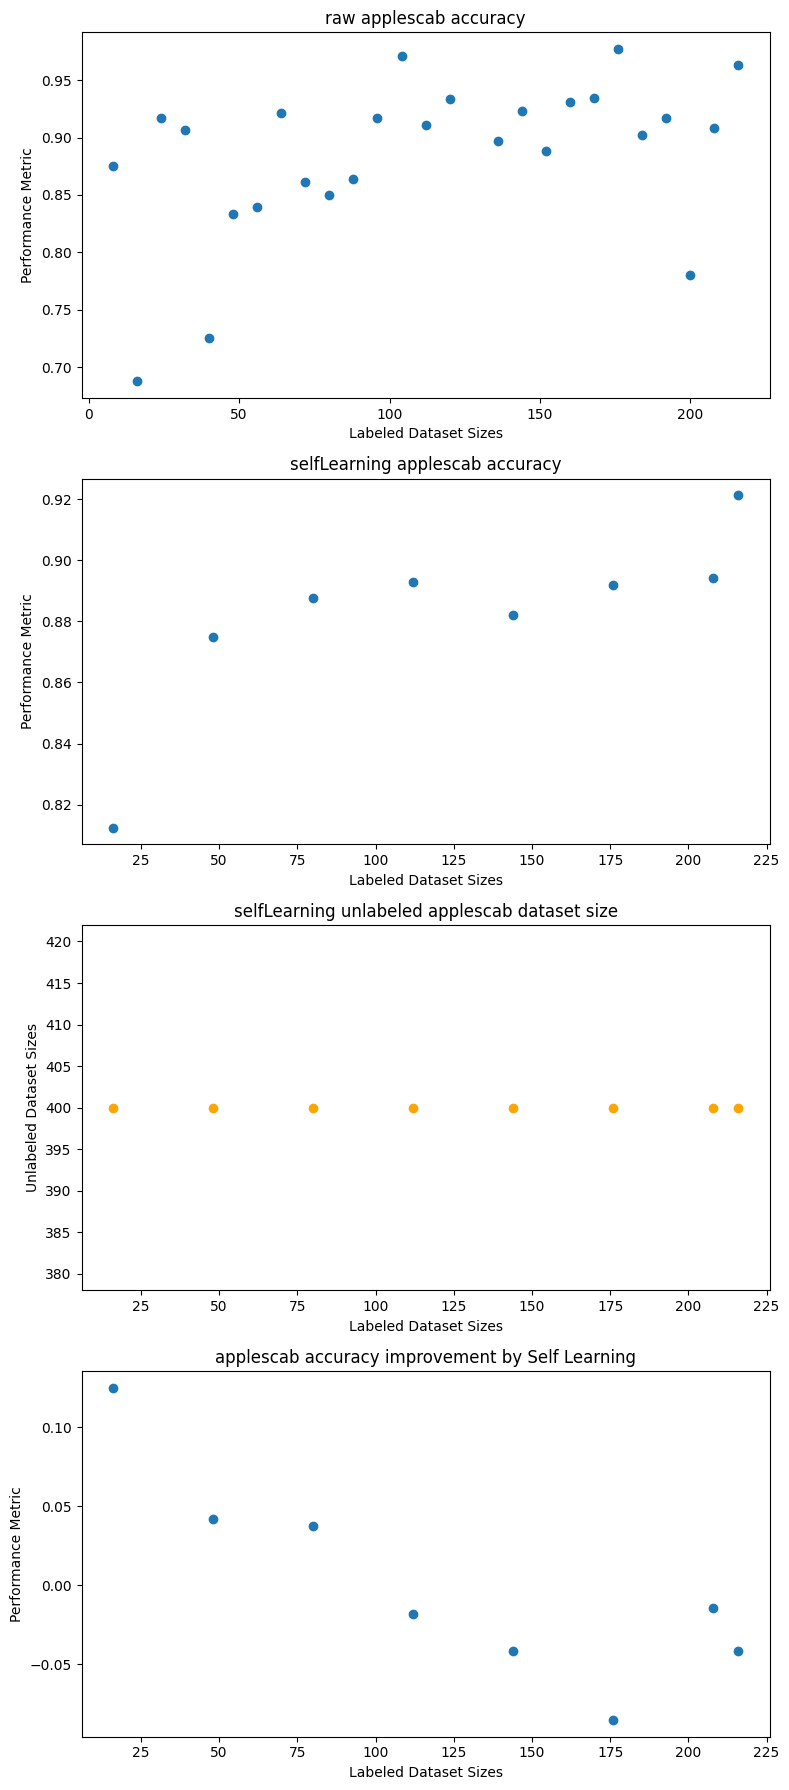

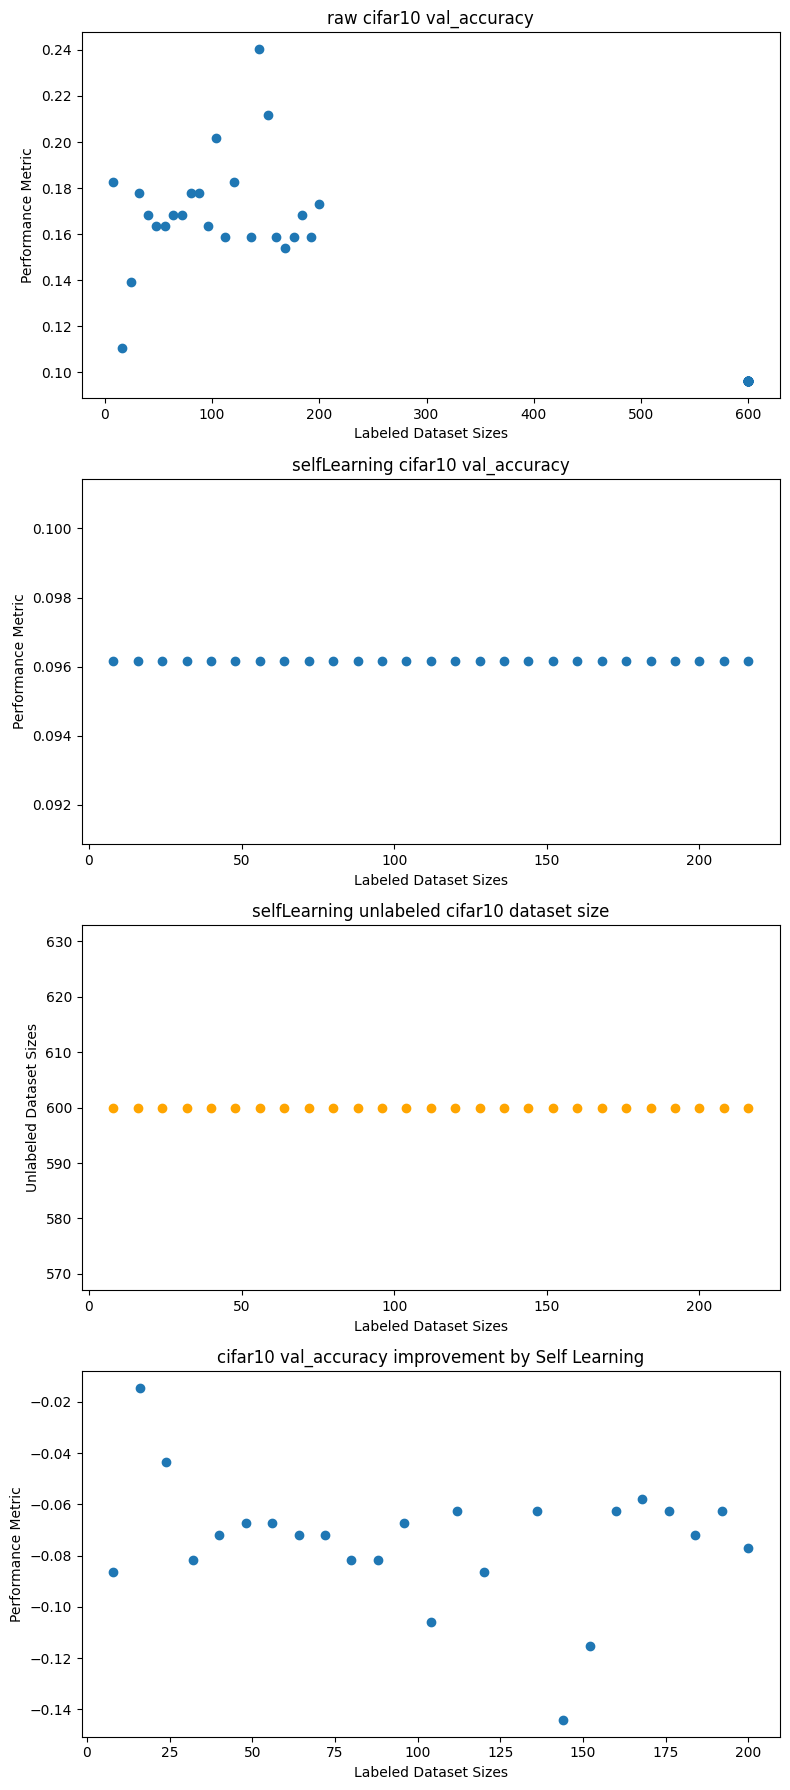

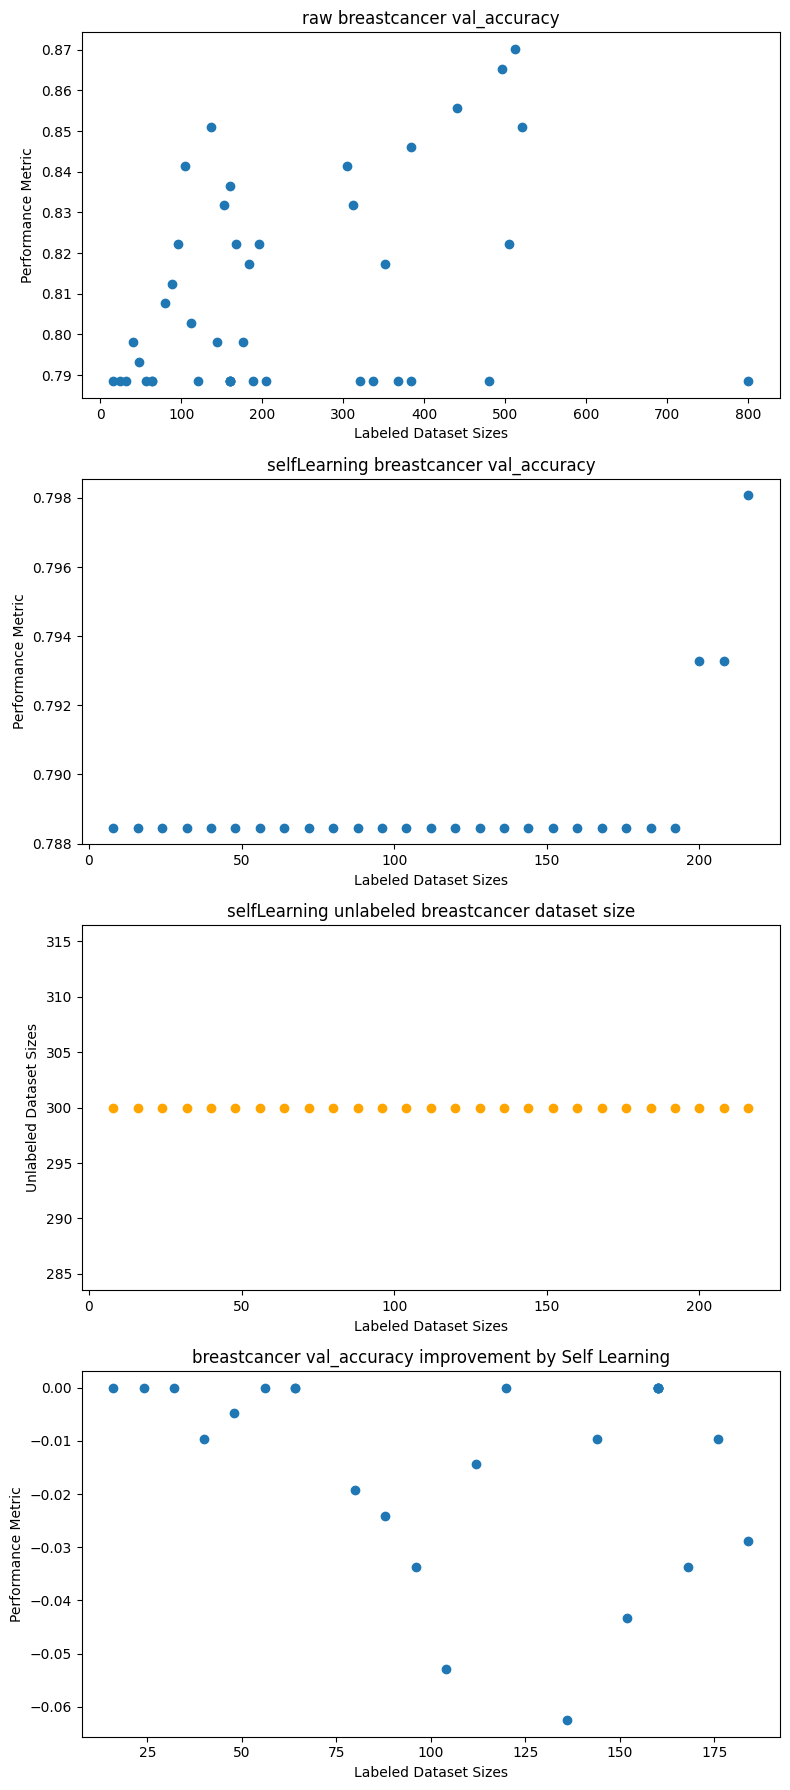

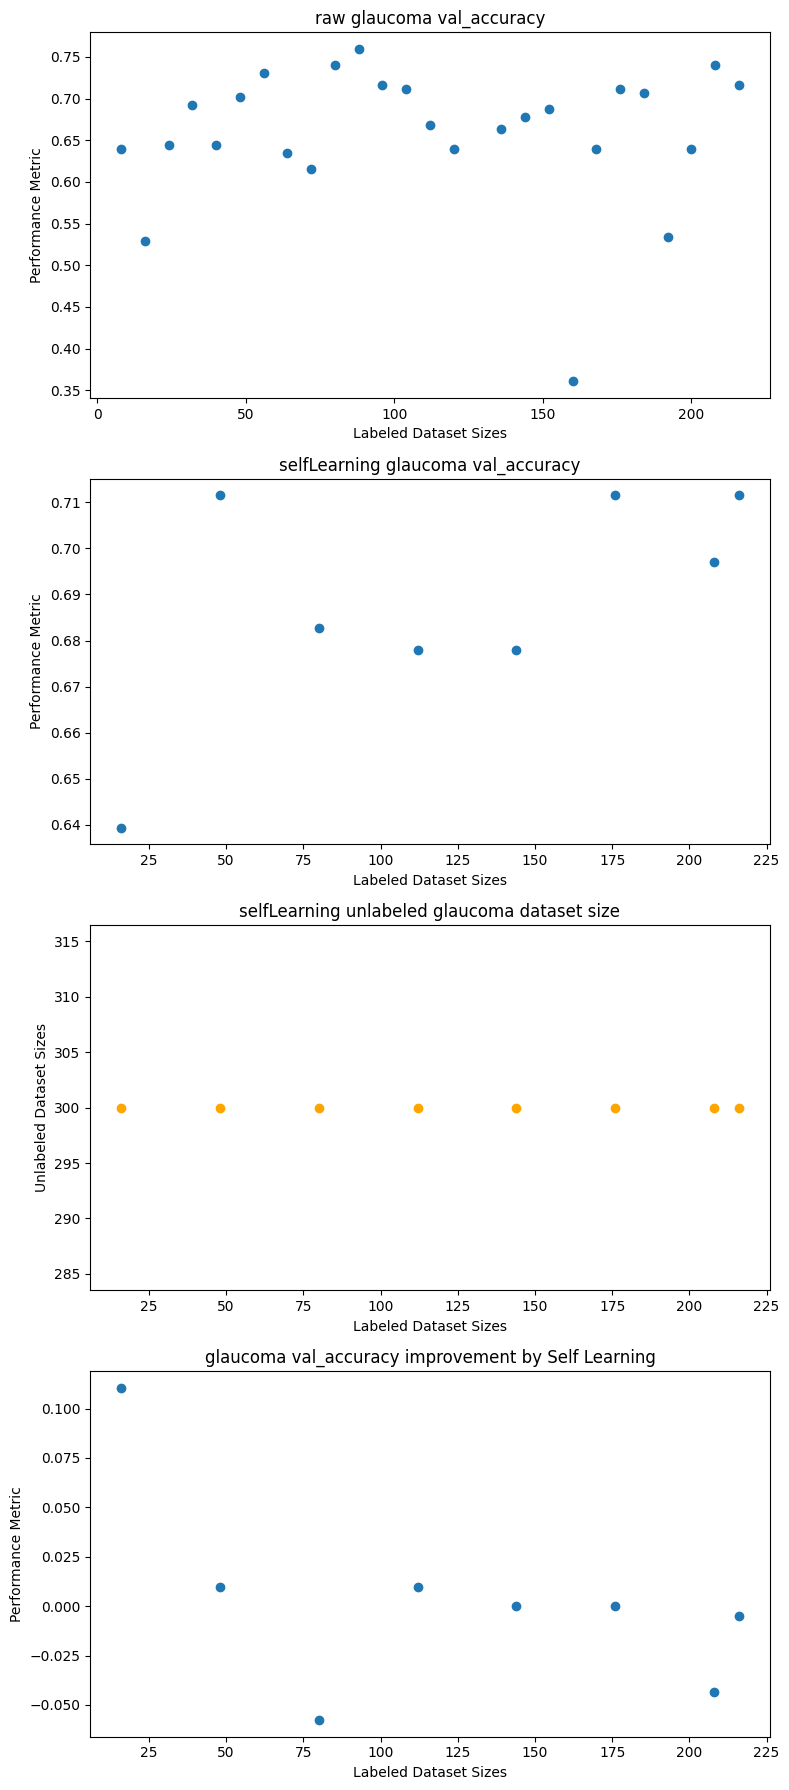

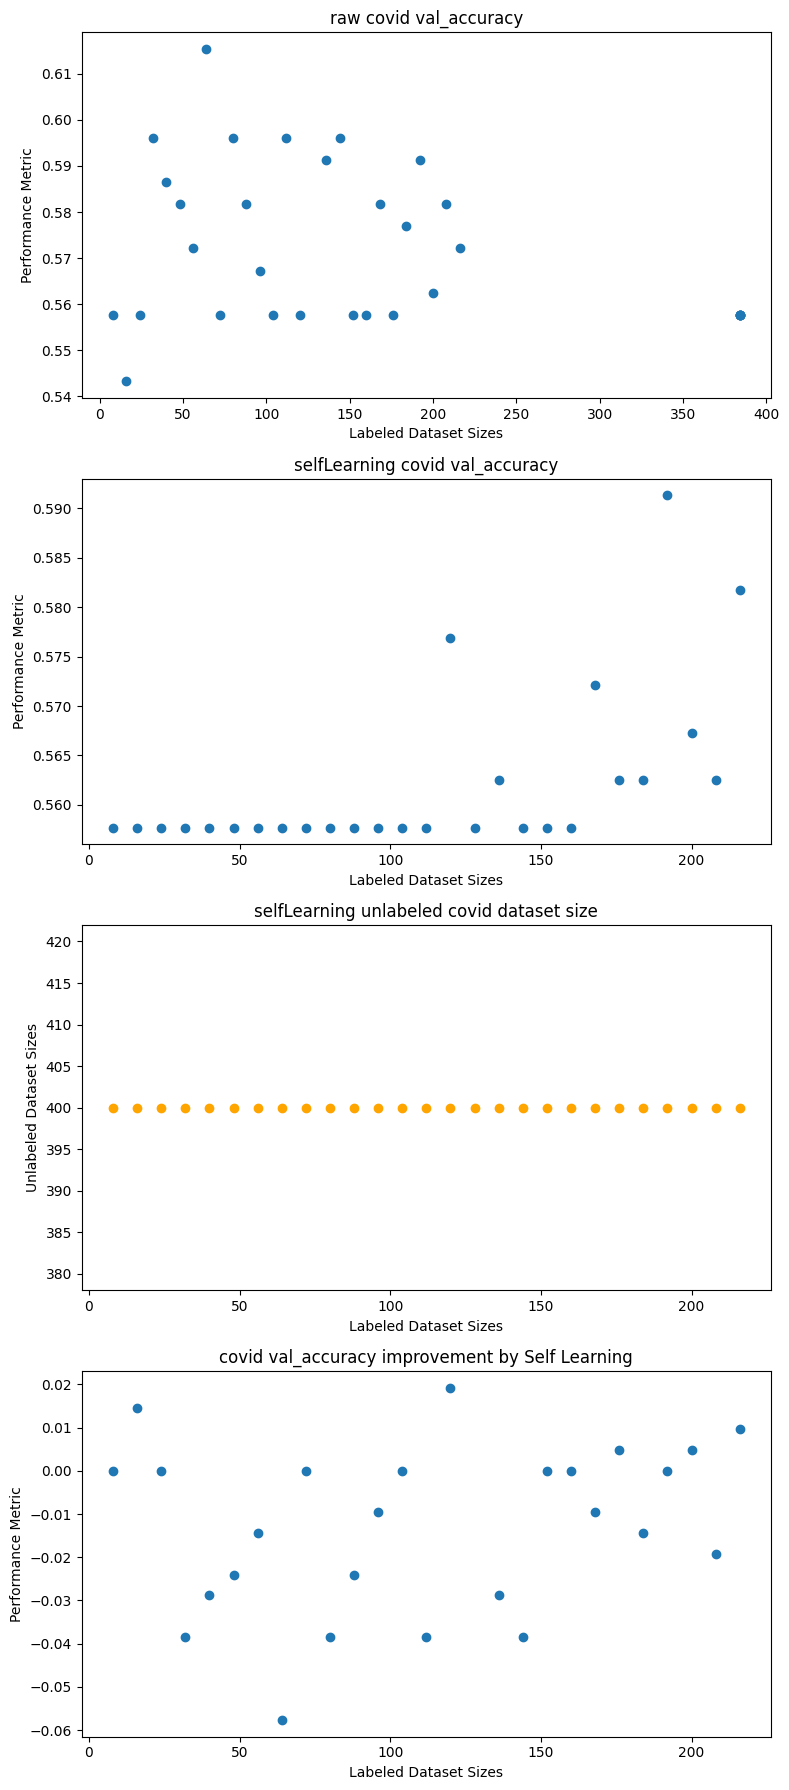

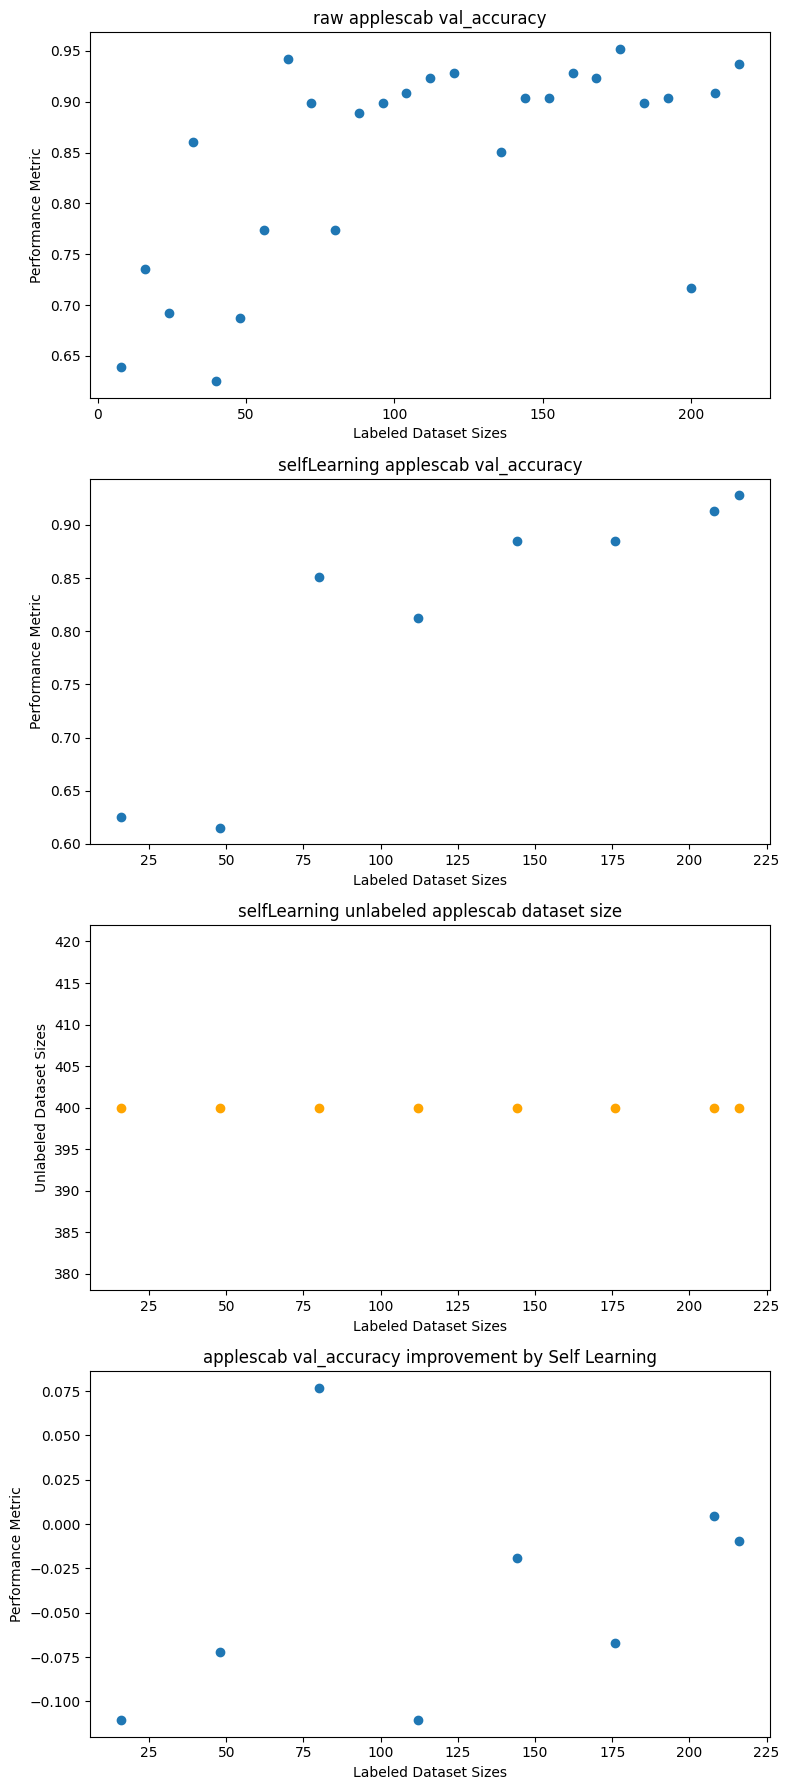

In [11]:

col = 'loss'
# in line 10 and 36 make min if loss and max if accuracy
dataset = 'breastcancer'
for col in 'accuracy val_accuracy'.split(): #SAME THING AS ['loss', 'val_loss']
  for dataset in 'cifar10 breastcancer glaucoma covid applescab'.split():
    selfless=[]
    littleNs=[]
    for filename in os.listdir(loc + 'Results'):
      if dataset in filename and 'elf' in filename:
        df = pd.read_csv(loc + 'Results/'+ filename)
        if col in list(df.columns):
          val = np.max(df[col].values)
          selfless.append (val)
          i0= filename.index ('_')
          i1= filename.index ('_',i0+ 1)
          littleNs.append (int(filename[i0 + 1: i1]))
          if (littleNs[-1] in [128,300,400]):
            del littleNs[-1]
            del selfless[-1]
    # plt.figure(figsize=(8,21))
    plt.subplots(4,1,figsize=(8,18))
    plt.subplot(411)
    plt.scatter(littleNs, selfless)
    plt.title('raw '+dataset+ ' ' +col)
    plt.xlabel('Labeled Dataset Sizes')
    plt.ylabel('Performance Metric')
    #plt.show()

    selfLearn=[]
    littleNs2=[]
    Ns = []
    for filename in os.listdir(loc + 'Results'):
      #change 's' to 'S' where little s is your data, and S is my data
      if dataset in filename and 'Self_' in filename:
        df = pd.read_csv(loc + 'Results/'+ filename)
        if col in list(df.columns):
          #selfLearn.append (np.max(df[col].values))
          #print(filename,np.max(df[col].values) )
          i0= filename.index ('_')
          i1= filename.index ('_',i0+ 1)
          i2= filename.index ('_',i1+ 1)
          #littleNs.append (int(filename[i1+1:i2]))
          #Ns.append (int(filename[i0+1:i1]))
          val = np.max(df[col].values)
          N = int(filename[i0+1:i1])
          n = int(filename[i1+1:i2])
          selfLearn.append (val)
          littleNs2.append (n)
          Ns.append (N)


    # plt.figure(figsize=(8,3))
    plt.subplot(412)
    plt.scatter(littleNs2, selfLearn)
    plt.title('selfLearning ' +dataset+ ' ' +col)
    plt.xlabel('Labeled Dataset Sizes')
    plt.ylabel('Performance Metric')
    #plt.show()

    # plt.figure(figsize=(8,3))
    plt.subplot(413)
    plt.scatter(littleNs2, Ns, color ='orange')
    plt.title('selfLearning unlabeled ' +dataset+ ' dataset size')
    plt.xlabel('Labeled Dataset Sizes')
    plt.ylabel('Unlabeled Dataset Sizes')
    #plt.show()

    sharedLittleNs = []
    perfDiff = []
    for i in littleNs:
      if i in littleNs2:
        sharedLittleNs.append(i)
        idx1 = littleNs.index(i)
        idx2 = littleNs2.index(i)
        selfLearnPerf = selfLearn[idx2]
        selfLessPerf = selfless[idx1]
        perfDiff.append(    selfLearnPerf - selfLessPerf)
    # plt.figure(figsize=(8,3))
    plt.subplot(414)
    plt.scatter(sharedLittleNs,perfDiff)
    plt.title(dataset+' '+col+' improvement by Self Learning')
    plt.xlabel('Labeled Dataset Sizes')
    plt.ylabel('Performance Metric')
    plt.tight_layout()

    plt.savefig(loc+'pltGraphs/'+dataset+'_'+col+'.png')
    plt.show()

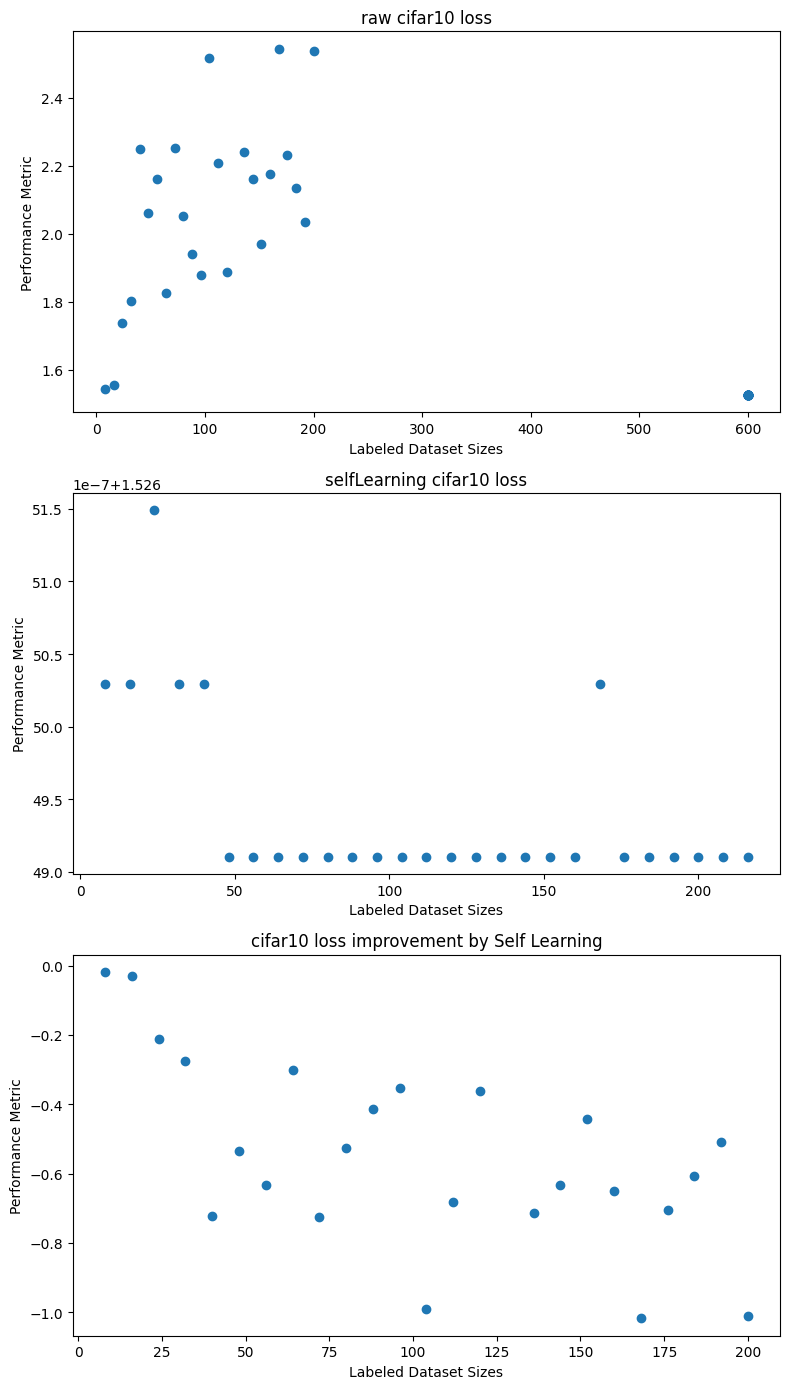

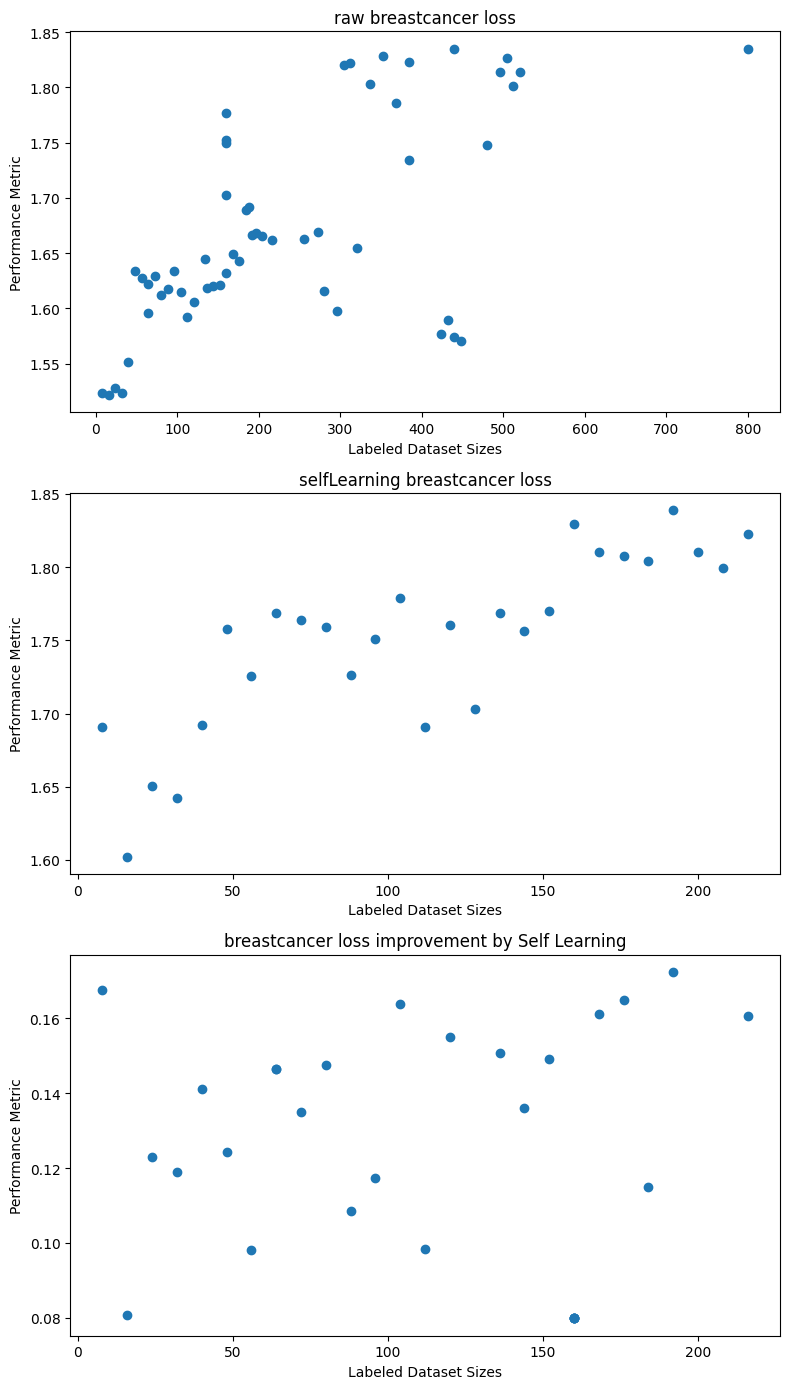

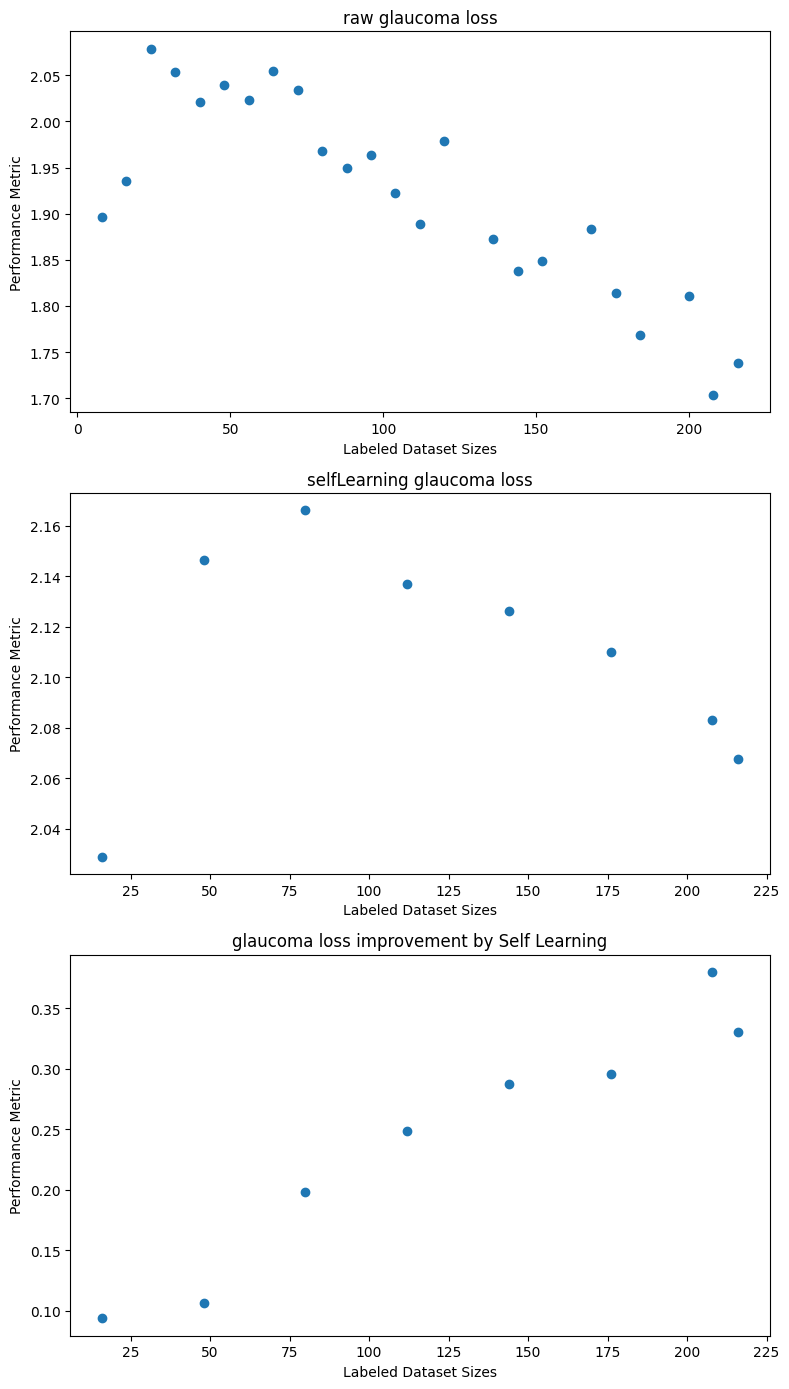

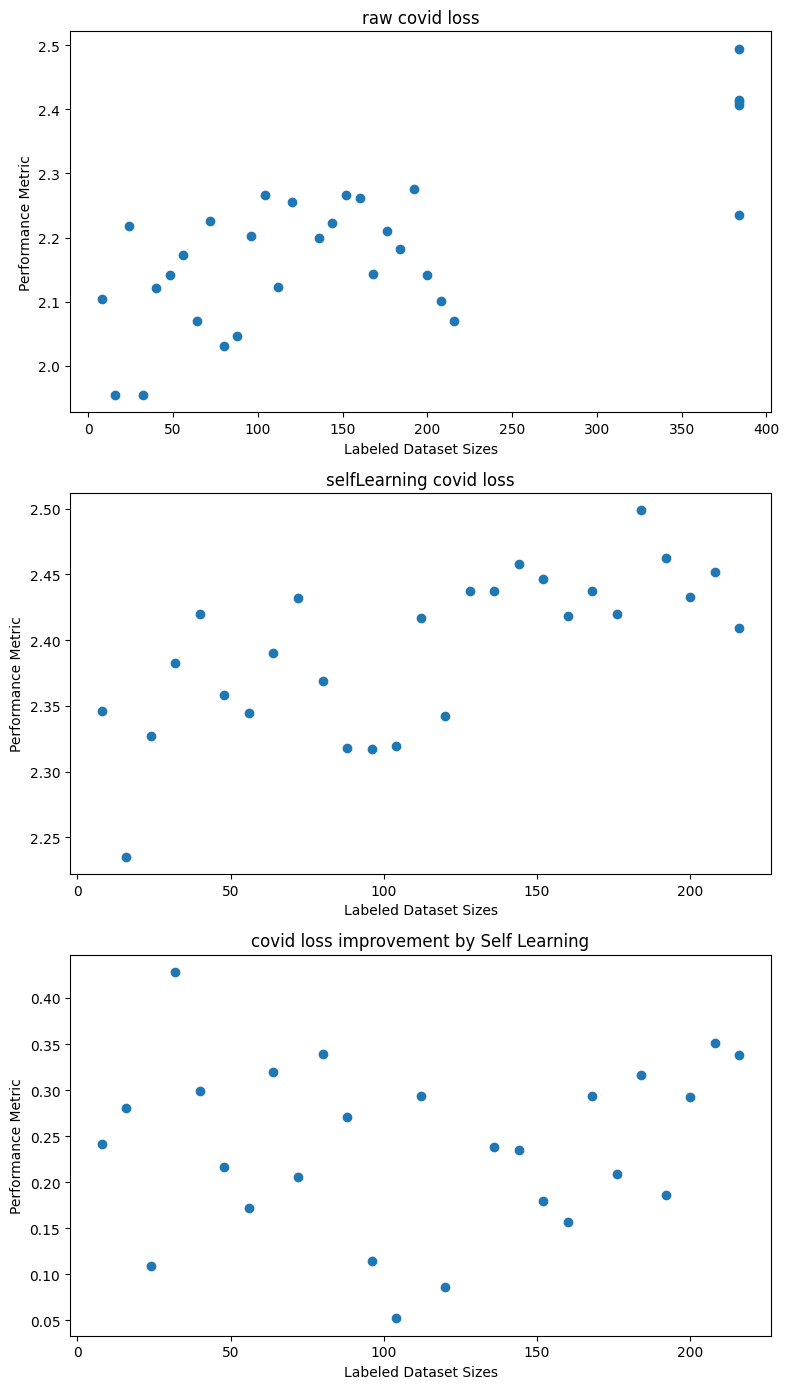

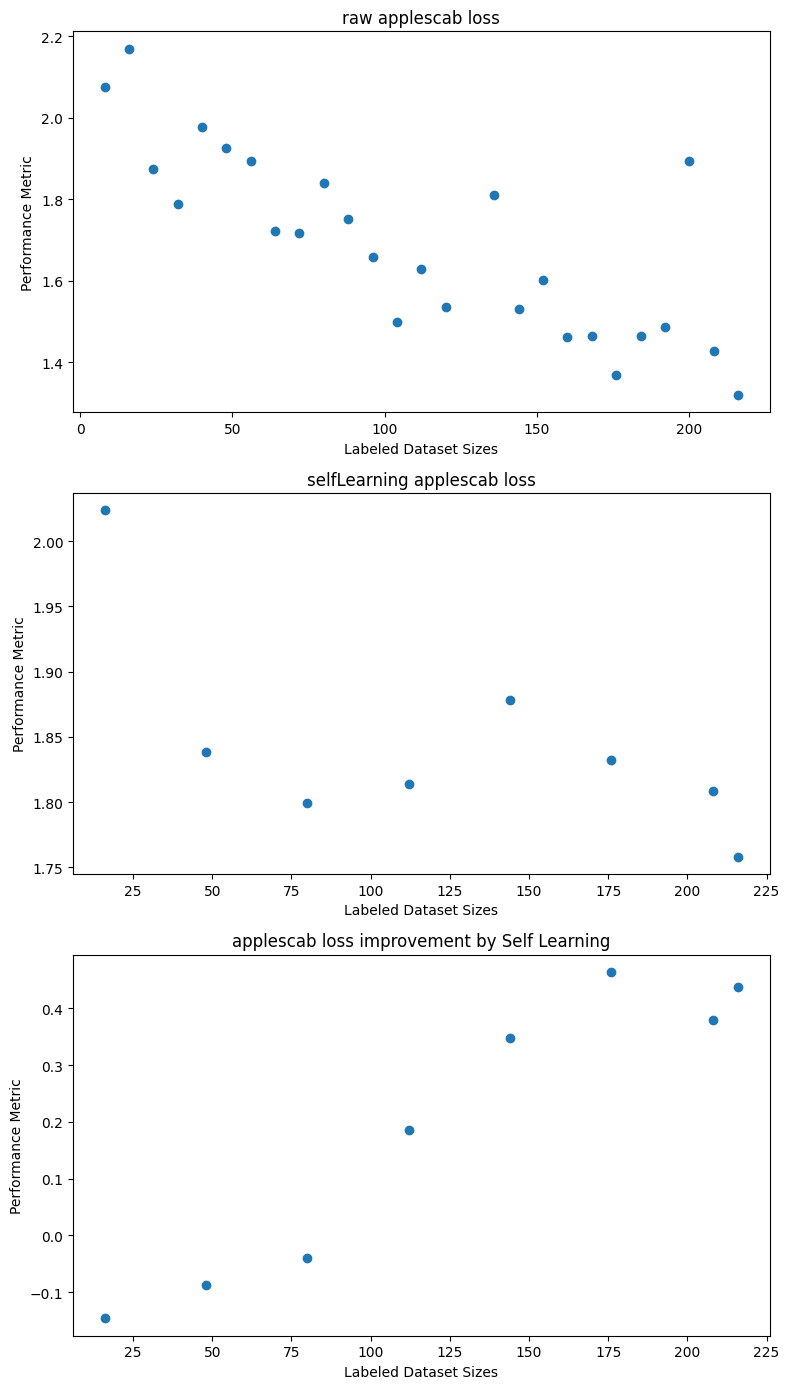

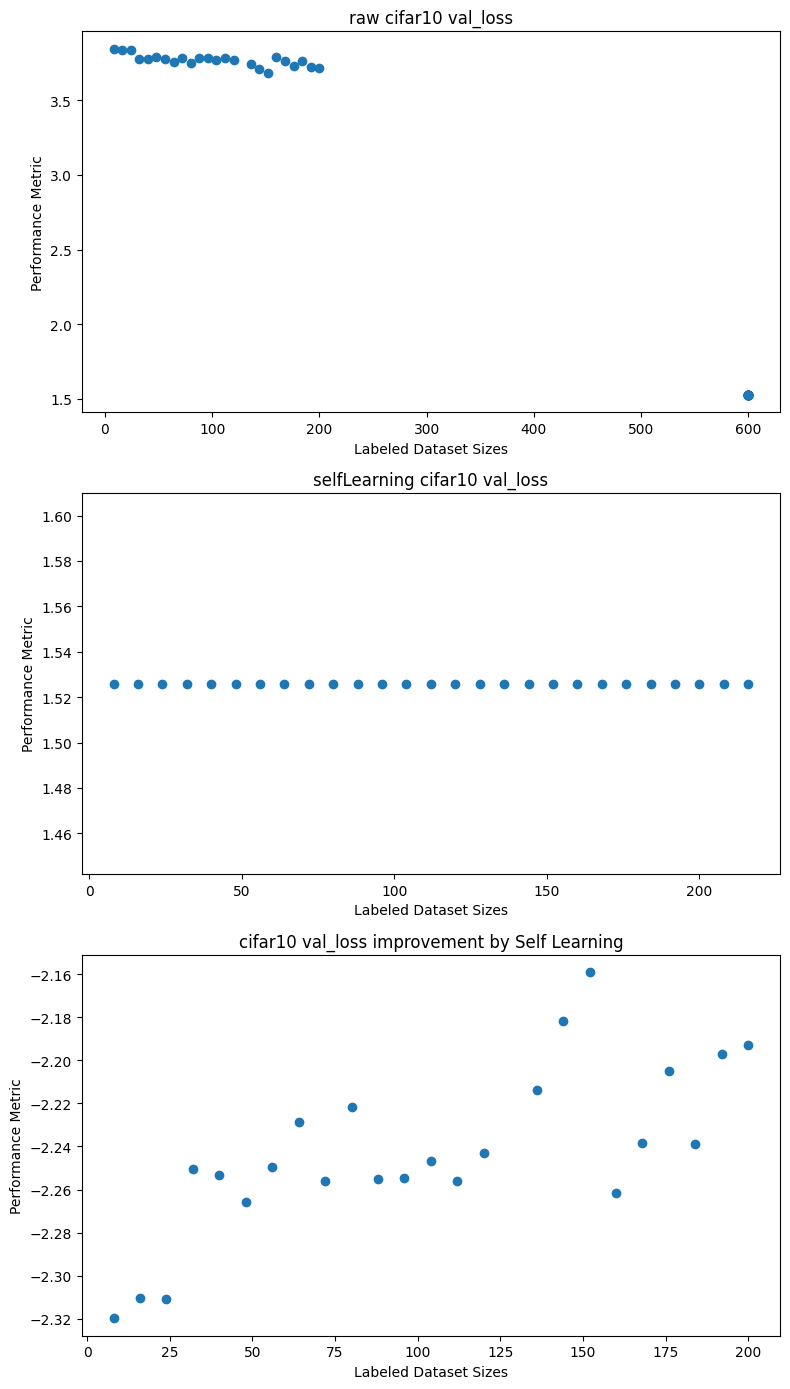

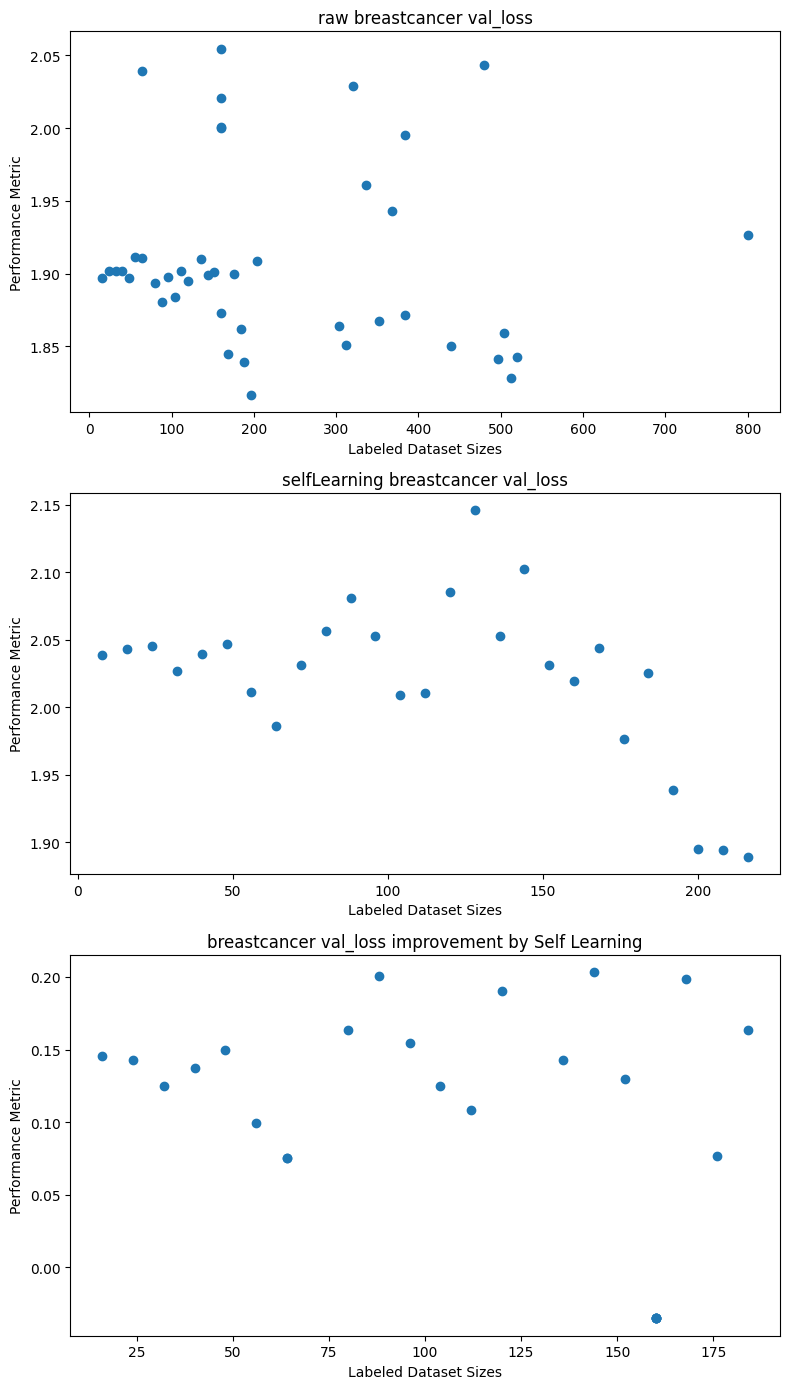

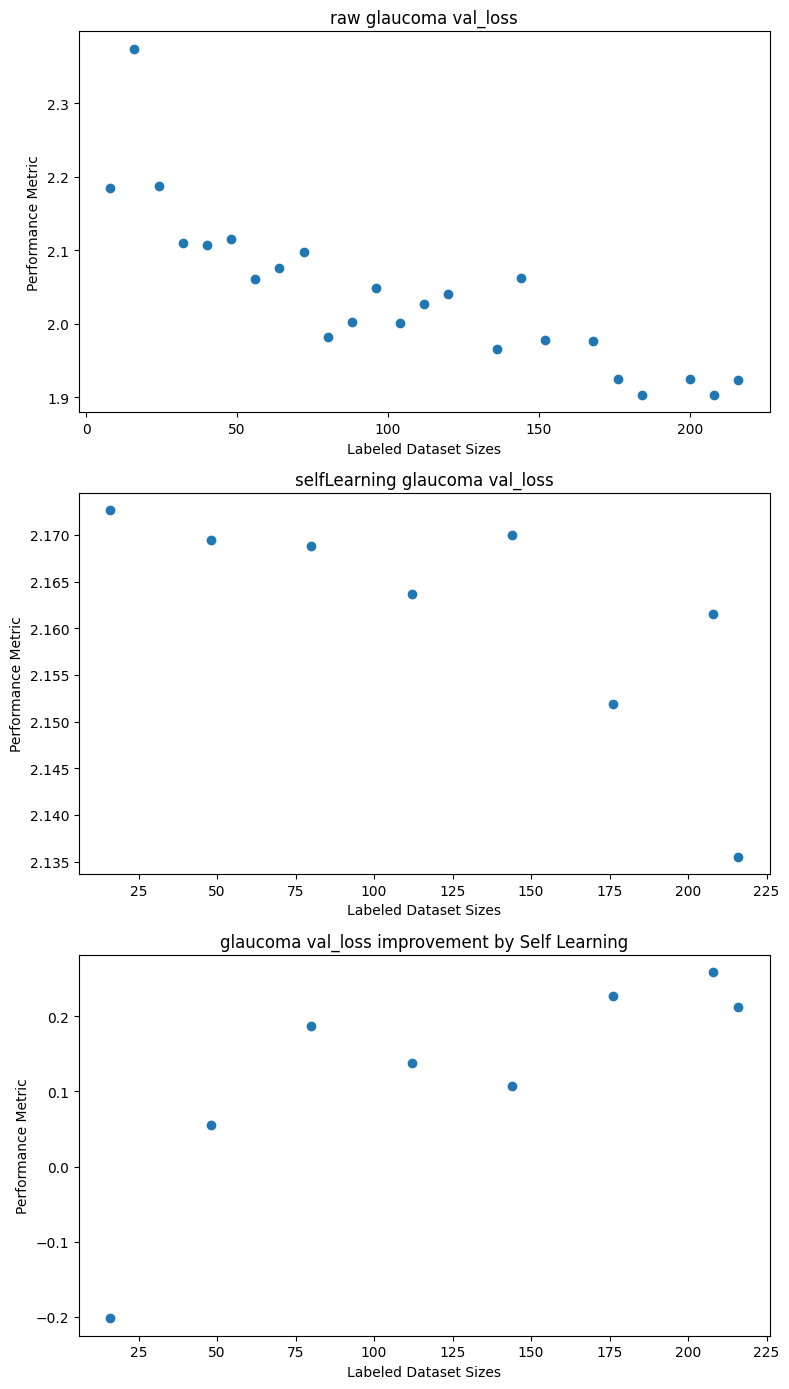

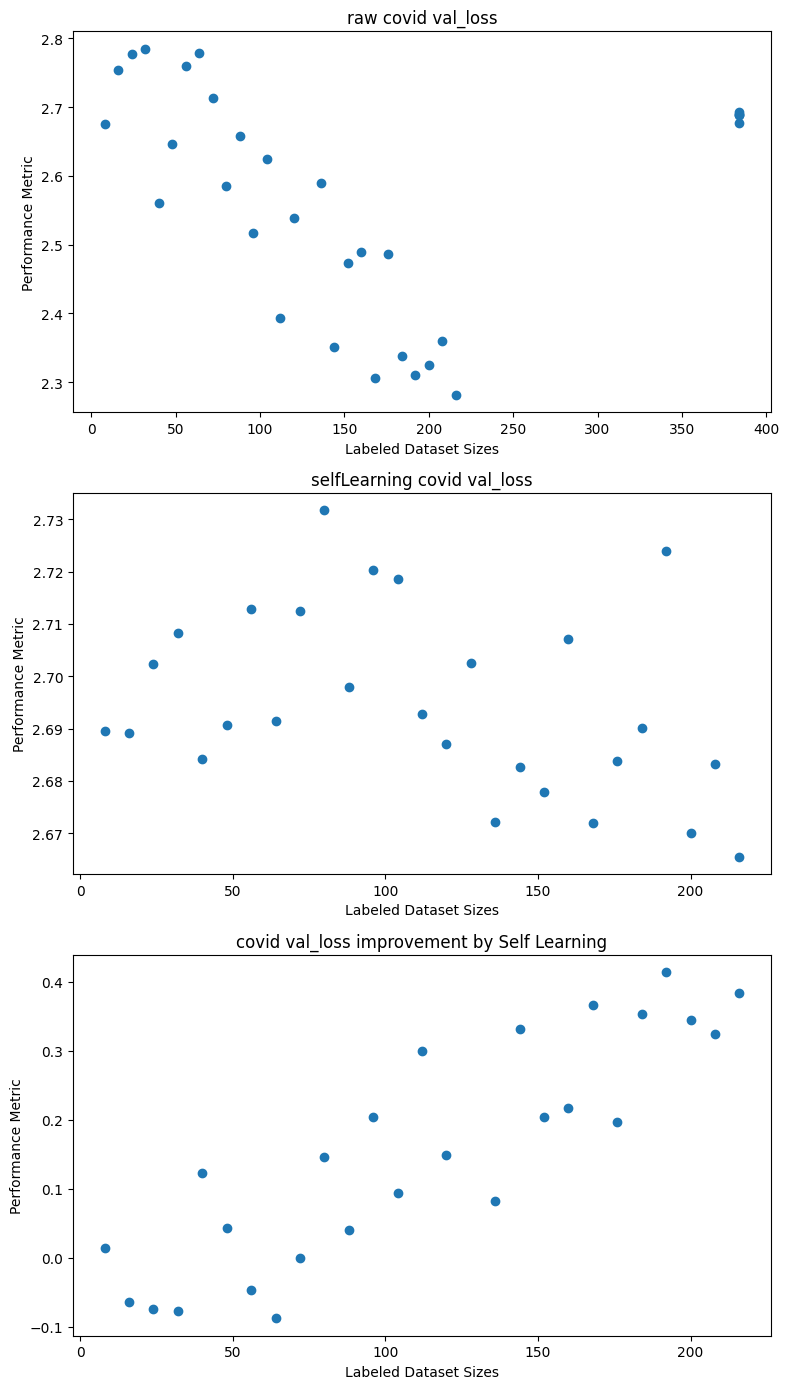

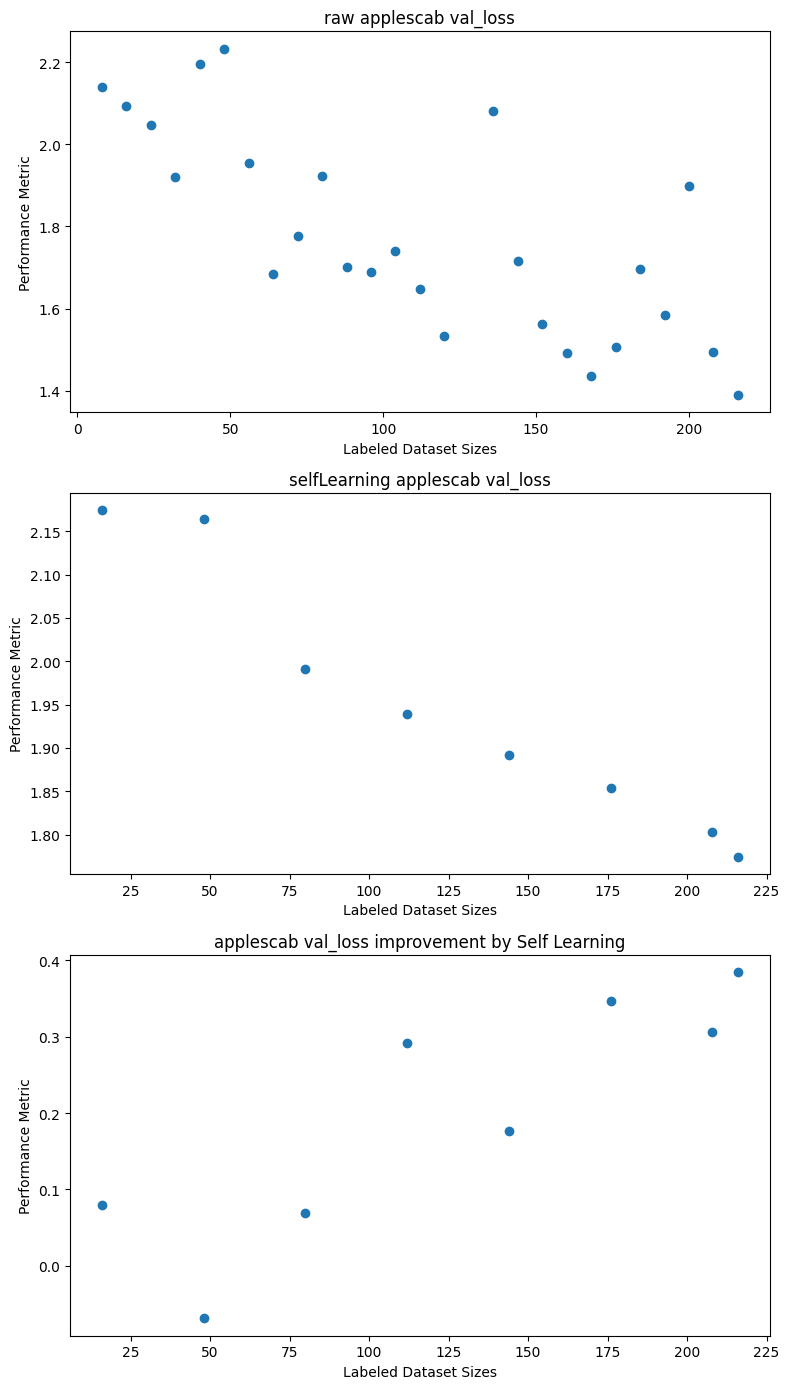

In [15]:

# recall we need max for acc and min for loss
for col in 'loss val_loss'.split(): #SAME THING AS ['loss', 'val_loss']
  for dataset in 'cifar10 breastcancer glaucoma covid applescab'.split():
    selfless=[]
    littleNs=[]
    for filename in os.listdir(loc + 'Results'):
      if dataset in filename and 'elf' in filename:
        df = pd.read_csv(loc + 'Results/'+ filename)
        if col in list(df.columns):
          val = np.min(df[col].values)
          selfless.append (val)
          i0= filename.index ('_')
          i1= filename.index ('_',i0+ 1)
          littleNs.append (int(filename[i0 + 1: i1]))
          if (littleNs[-1] in [128,300,400]):
            del littleNs[-1]
            del selfless[-1]
    # plt.figure(figsize=(8,21))
    plt.subplots(3,1,figsize=(8,14))
    plt.subplot(311)
    plt.scatter(littleNs, selfless)
    plt.title('raw '+dataset+ ' ' +col)
    plt.xlabel('Labeled Dataset Sizes')
    plt.ylabel('Performance Metric')
    #plt.show()

    selfLearn=[]
    littleNs2=[]
    Ns = []
    for filename in os.listdir(loc + 'Results'):
      #change 's' to 'S' where little s is your data, and S is my data
      if dataset in filename and 'Self_' in filename:
        df = pd.read_csv(loc + 'Results/'+ filename)
        if col in list(df.columns):
          #selfLearn.append (np.max(df[col].values))
          #print(filename,np.max(df[col].values) )
          i0= filename.index ('_')
          i1= filename.index ('_',i0+ 1)
          i2= filename.index ('_',i1+ 1)
          #littleNs.append (int(filename[i1+1:i2]))
          #Ns.append (int(filename[i0+1:i1]))
          val = np.min(df[col].values)
          N = int(filename[i0+1:i1])
          n = int(filename[i1+1:i2])
          selfLearn.append (val)
          littleNs2.append (n)
          Ns.append (N)


    # plt.figure(figsize=(8,3))
    plt.subplot(312)
    plt.scatter(littleNs2, selfLearn)
    plt.title('selfLearning ' +dataset+ ' ' +col)
    plt.xlabel('Labeled Dataset Sizes')
    plt.ylabel('Performance Metric')
    #plt.show()

    # plt.figure(figsize=(8,3))
    plt.subplot(313)
    # plt.scatter(littleNs2, Ns, color ='orange')
    # plt.title('selfLearning unlabeled ' +dataset+ ' dataset size')
    # plt.xlabel('Labeled Dataset Sizes')
    # plt.ylabel('Unlabeled Dataset Sizes')
    # #plt.show()

    sharedLittleNs = []
    perfDiff = []
    for i in littleNs:
      if i in littleNs2:
        sharedLittleNs.append(i)
        idx1 = littleNs.index(i)
        idx2 = littleNs2.index(i)
        selfLearnPerf = selfLearn[idx2]
        selfLessPerf = selfless[idx1]
        perfDiff.append(    selfLearnPerf - selfLessPerf)
    # plt.figure(figsize=(8,3))
    # plt.subplot(414)
    plt.scatter(sharedLittleNs,perfDiff)
    plt.title(dataset+' '+col+' improvement by Self Learning')
    plt.xlabel('Labeled Dataset Sizes')
    plt.ylabel('Performance Metric')
    plt.tight_layout()

    plt.savefig(loc+'pltGraphs/clean'+dataset+'_'+col+'.png')
    plt.show()